In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.cluster import KMeans

In [3]:
df= pd.read_csv('C:/Users/Ronfo/Desktop/Mall_Customers.csv')


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

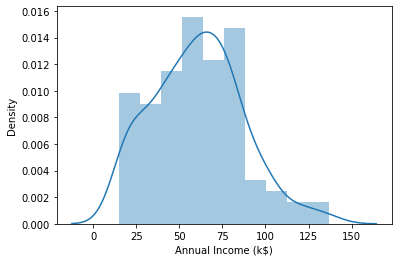

In [6]:
sns.distplot(df['Annual Income (k$)'])

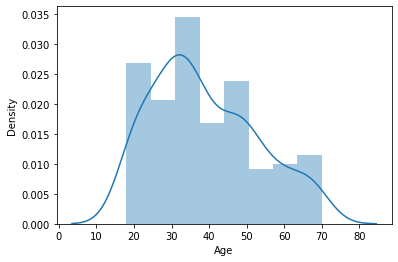

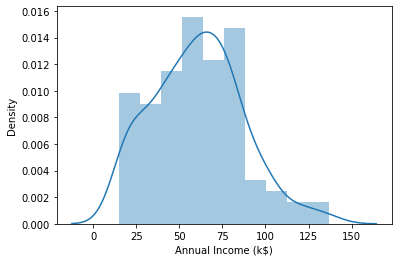

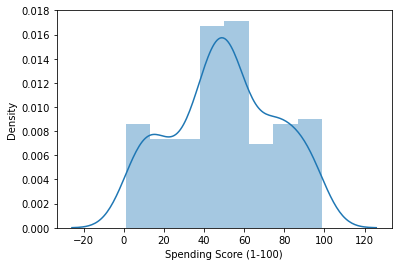

In [7]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

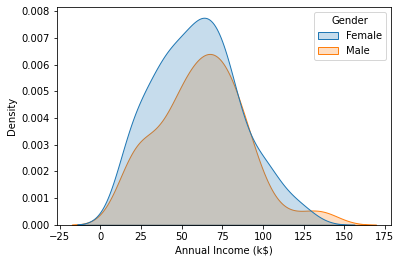

In [14]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)

In [9]:
df['Gender'] = df['Gender'].astype('category')

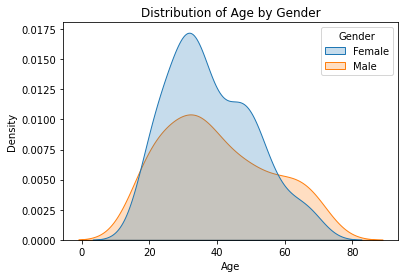

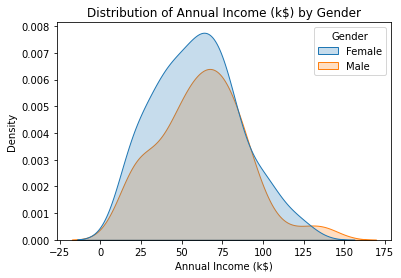

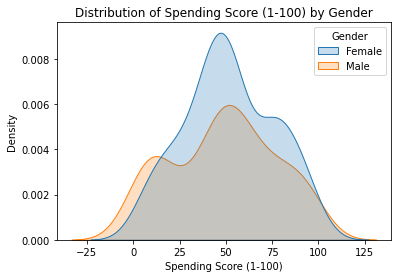

In [13]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', shade=True)
    plt.title(f'Distribution of {i} by Gender')
    plt.show()

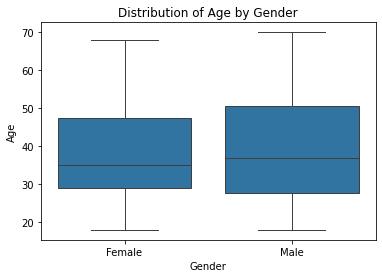

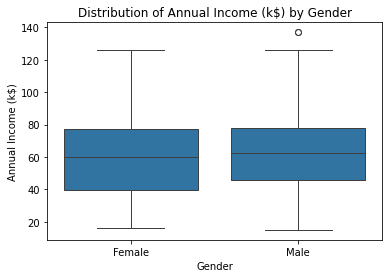

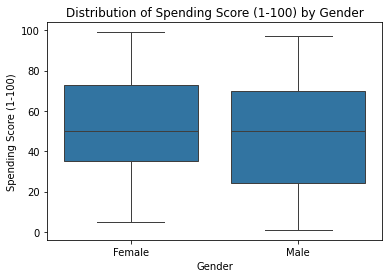

In [18]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])
    plt.title(f'Distribution of {i} by Gender')
    plt.show()

In [20]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate  Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

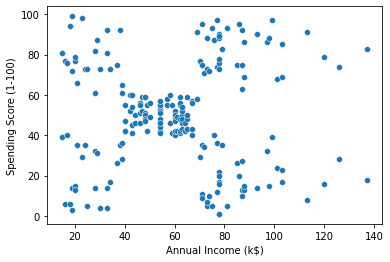

In [23]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

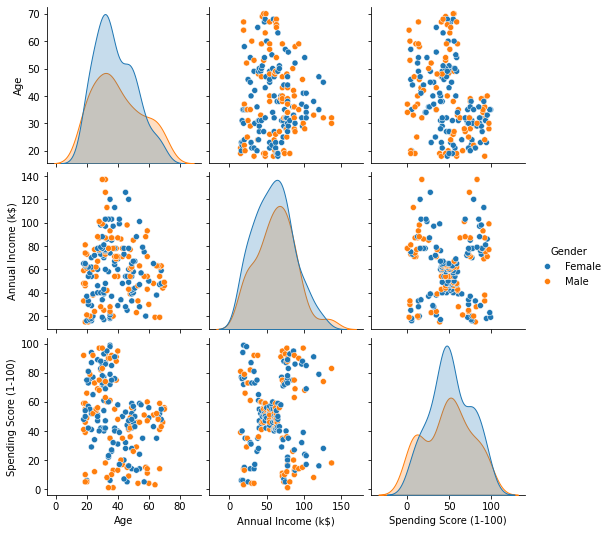

In [26]:
#df=df.drop('CustomerID', axis=1)
sns.pairplot(df, hue= 'Gender')

In [27]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [28]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

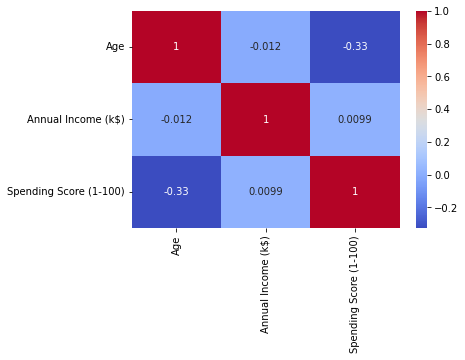

In [30]:
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

# Clustering  -- Univariate, Bivariate, Multivariate

In [52]:
clustering1 = KMeans(n_clusters = 3)

In [53]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [54]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
df['Income Cluster'] = clustering1.labels_

In [56]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [57]:
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [58]:
clustering1.inertia_

23517.33093093092

In [59]:
interia_Scores = []
for i in range(1,11) : 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    interia_Scores.append(kmeans.inertia_)

In [60]:
interia_Scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3984.9070593149604,
 2831.296031746034,
 2168.478715728716,
 1876.7904337492564]

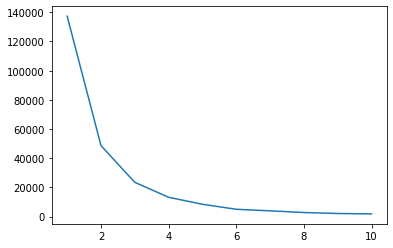

In [61]:
plt.plot(range(1,11),interia_Scores)

In [64]:
 df.groupby('Income Cluster')[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [62]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

# Bivariate Clustering


In [69]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and income cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


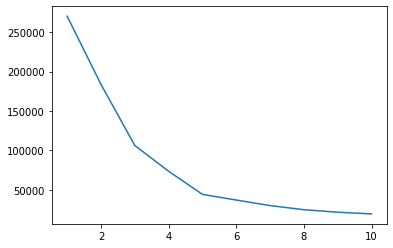

In [70]:
interia_Scores2 = []
for i in range(1,11) : 
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    interia_Scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),interia_Scores2)

In [83]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

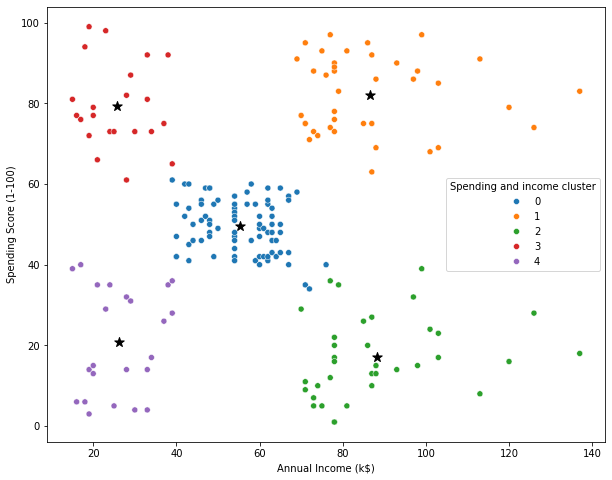

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(x= centers ['x'],y= centers ['y'], s= 100, c= 'black', marker ='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and income cluster', palette = 'tab10' )

In [87]:
pd.crosstab(df['Spending and income cluster'], df['Gender'], normalize= 'index')

Gender,Female,Male
Spending and income cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [88]:
 df.groupby('Spending and income cluster')[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and income cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# multivaritate clustering 

In [89]:
 from sklearn.preprocessing import StandardScaler

In [90]:
scale = StandardScaler()

In [91]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


In [93]:
dff= pd.get_dummies(df, drop_first = True)
dff

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,3,1
2,20,16,6,1,4,0
3,23,16,77,1,3,0
4,31,17,40,1,4,0
...,...,...,...,...,...,...
195,35,120,79,2,1,0
196,45,126,28,2,2,0
197,32,126,74,2,1,1
198,32,137,18,2,2,1


In [94]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and income cluster', 'Gender_Male'],
      dtype='object')

In [95]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',  'Gender_Male']]

In [96]:
dff

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [97]:
dff = scale.fit_transform(dff)

In [99]:
dff= pd.DataFrame(scale.fit_transform(dff))

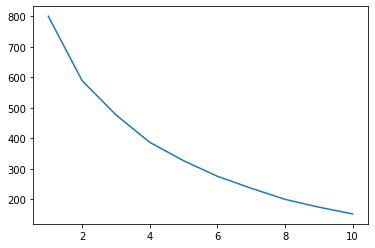

In [100]:
interia_Scores3 = []
for i in range(1,11) : 
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    interia_Scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),interia_Scores3)

In [101]:
df.to_csv('Clustering.csv')